**MULTIPROCESSING**

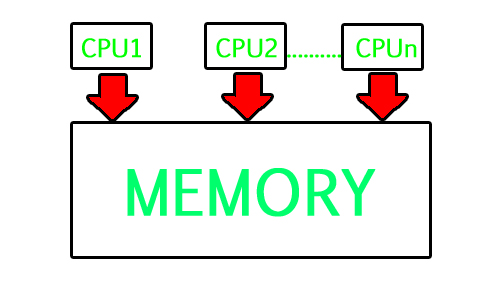










1. **What?**
Multiprocessing refers to the ability of a system to support more than one processor at the same time. Applications in a multiprocessing system are broken to smaller routines that run independently. The operating system allocates these threads to the processors improving performance of the system.

2. **Why**? 
Consider a computer system with a single processor. If it is assigned several processes at the same time, it will have to interrupt each task and switch briefly to another, to keep all of the processes going. This situation is just like a chef working in a kitchen alone. He has to do several tasks like baking, stirring, kneading dough, etc.

     The more tasks you must do at once, the more difficult it gets to keep     track of them all, and keeping the timing right becomes more of a challenge.

3. **How?**
A multiprocessing system can have: multiprocessor, i.e. a computer with more than one central processor.
multi-core processor, i.e. a single computing component with two or more independent actual processing units (called “cores”).

  Here, the CPU can easily executes several tasks at once, with each task using its own processor. It is just like the chef in last situation being assisted by his assistants. Now, they can divide the tasks among themselves and chef doesn’t need to switch between his tasks.



**Create 2 processes(functions) running at 2 different time not simultaneously**

In [ ]:
"""function to print cube of given num"""
def print_cube(num):                                               
                                                                
    print("Cube: {}".format(num * num * num))

In [ ]:
 """function to print square of given num"""
 def print_square(num):
  
    print("Square: {}".format(num * num))

In [ ]:
print_cube(3)

Cube: 27


In [ ]:
print_square(2)

Square: 4


**MULTIPROCESSING in Python:** The multiprocessing module in python will run 2 or more processes simultaneously through various processors which is time Efficient.

In [ ]:
import multiprocessing

In [ ]:
multiprocessing.cpu_count()   #returns the number of cores


2

In [ ]:
p1 = multiprocessing.Process(target=print_cube, args=(3,))              #Process is a class defined in multiprocessing module which takes a target to be executed 
p2 = multiprocessing.Process(target=print_square, args=(4,))            #p1 and p2 are 2 processess whcih are going to perform different execution at same time

In [ ]:
p1.start()                                                              #p1.start() is use to start the execution or processor will start executing p1.
p2.start()

Cube: 27
Square: 16


In [ ]:
p1.join()                                                                #p1.join() is use to stop the execution or processor waits until p1 is executed to after.
p2.join()
print("DONE,both processes worked simultaneously")

DONE,both processes worked simultaneously


In [ ]:
p1.is_alive()    

False

**OS module** : The OS module in Python provides functions for interacting with the operating system. OS comes under Python’s standard utility modules.

In [ ]:
import os

In [ ]:
def worker1():
    # printing process id
    print("ID of process running worker1: {}".format(os.getpid()))
 
def worker2():
    # printing process id
    print("ID of process running worker2: {}".format(os.getpid()))
 

In [ ]:
if __name__ == "__main__":
    # printing main program process id
    print("ID of main process: {}".format(os.getpid()))
 
    # creating processes
    p1 = multiprocessing.Process(target=worker1)
    p2 = multiprocessing.Process(target=worker2)
 
    # starting processes
    p1.start()
    p2.start()
 
    # process IDs
    print("ID of process p1: {}".format(p1.pid))
    print("ID of process p2: {}".format(p2.pid))
 
    # wait until processes are finished
    p1.join()
    p2.join()
 
    # both processes finished
    print("Both processes finished execution!")
 
    # check if processes are alive
    print("Process p1 is alive: {}".format(p1.is_alive()))
    print("Process p2 is alive: {}".format(p2.is_alive()))

ID of main process: 60
ID of process running worker2: 491
ID of process running worker1: 488
ID of process p1: 488
ID of process p2: 491
Both processes finished execution!
Process p1 is alive: False
Process p2 is alive: False


**SHARING DATA BETWEEN PROCESSES**

1. In multiprocessing, any newly created process will do following:
*   run independently
*   have their own memory space.


In [ ]:
result = []

In [ ]:
def square_list(mylist):
    global result

    for num in mylist:
        result.append(num * num)
    print("Result: {}".format(result))

In [ ]:
mylist = [1,2,3,4]

In [ ]:
p1 = multiprocessing.Process(target=square_list, args=(mylist,))
p1.start()
p1.join()

Result: [1, 4, 9, 16]


In [ ]:
result

[]

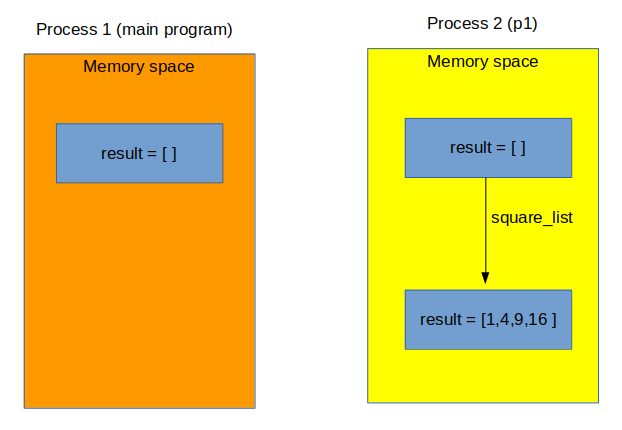

**Method 1: Shared memory**
multiprocessing module provides Array and Value objects to share data between processes. 
*  Array: a ctypes array allocated from shared memory.
*  Value: a ctypes object allocated from shared memory.

In [ ]:
import multiprocessing

In [ ]:
def square_list(mylist, result, square_sum):
    
    for idx, num in enumerate(mylist):
        result[idx] = num * num
    
    square_sum.value = sum(result)

In [ ]:
mylist = [1,2,3,4]


In [ ]:
result = multiprocessing.Array('i', 4)
square_sum = multiprocessing.Value('i')

p1 = multiprocessing.Process(target=square_list, args=(mylist, result, square_sum))

In [ ]:
p1.start()
p1.join()

In [ ]:
print(result[:])

[1, 4, 9, 16]


In [ ]:
square_sum.value

30

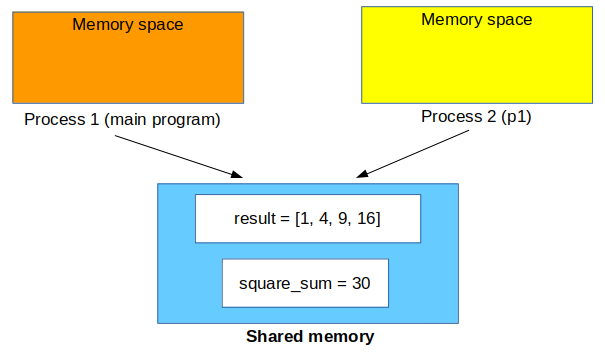

**Method 2: Server Process**

Whenever a python program starts, a **server process** is also started. From there on, whenever a new process is needed, the parent process connects to the server and requests it to fork a new process. A server process can hold Python objects and allows other processes to manipulate them using proxies.

multiprocessing module provides a **Manager** class which controls a server process. Hence, managers provide a way to create data which can be shared between different processes.

In [ ]:
import multiprocessing

In [ ]:
def print_records(records):
    for record in records:
        print("Name: {0}\nScore: {1}\n".format(record[0], record[1]))

def insert_record(record, records):
    records.append(record)
    print("New record added!\n")

In [ ]:
with multiprocessing.Manager() as manager:
    records = manager.list([('Sam', 10), ('Adam', 9), ('Kevin',9)])
    new_record = ('Jeff', 8)

    p1 = multiprocessing.Process(target=insert_record, args=(new_record, records))
    p2 = multiprocessing.Process(target=print_records, args=(records,))
    
    p1.start()
    p1.join()
    
    p2.start()
    p2.join()

New record added!

Name: Sam
Score: 10

Name: Adam
Score: 9

Name: Kevin
Score: 9

Name: Jeff
Score: 8



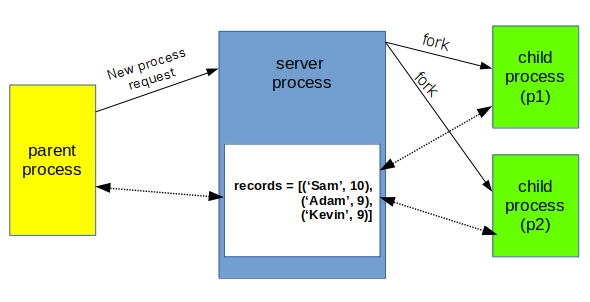

**Communication between processes**
Effective use of multiple processes usually requires some communication between them, so that work can be divided and results can be aggregated.

Multiprocessing supports two types of communication channel between processes:
*  Queue
*  Pipe


**Method 1: Queue**
A simple way to communicate between process with multiprocessing is to use a Queue to pass messages back and forth. Any Python object can pass through a Queue.

In [ ]:
import multiprocessing

In [ ]:
def square_list(mylist, q):
    for num in mylist:
        q.put(num * num)
        
def print_list(q):
    while not q.empty():
        print(q.get())

In [ ]:
q = multiprocessing.Queue()

In [ ]:
p1 = multiprocessing.Process(target=square_list, args=([1,2,3,4], q))
p2 = multiprocessing.Process(target=print_list, args=(q,))

In [ ]:
p1.start()
p2.start()

p1.join()
p2.join()

1
4
9
16


**Method 2: Pipe**

*  A Pipe() can only have two endpoints.
*  A Queue() can have multiple producers and consumers.
*  If you need more than two points to communicate, use a Queue().   
* If you need absolute performance, a Pipe() is much faster because Queue() is built on top of Pipe().


In [ ]:
import multiprocessing

In [ ]:
def send_msgs(conn, msgs):
    for msg in msgs:
        conn.send(msg)
    conn.close()
    
def recv_msg(conn):
    while 1:
        msg = conn.recv()
        if msg == "END":
            break
        print(msg)

In [ ]:
msgs = ["Hey", "Hello", "Hru?", "END"]

In [ ]:
parent_conn, child_conn = multiprocessing.Pipe()

In [ ]:
p1 = multiprocessing.Process(target=send_msgs, args=(parent_conn, msgs))
p2 = multiprocessing.Process(target=recv_msg, args=(child_conn,))

In [ ]:
p1.start()
p2.start()

p1.join()
p2.join()

Hey
Hello
Hru?


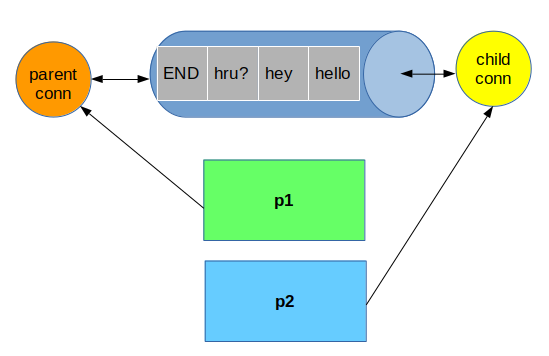

Data in a pipe may become corrupted if two processes (or threads) try to read from or write to the same end of the pipe at the same time. Of course there is no risk of corruption from processes using different ends of the pipe at the same time. Also note that, Queues do proper synchronization between processes, at the expense of more complexity. Hence, queues are said to be thread and process safe!

**Pooling between processes**

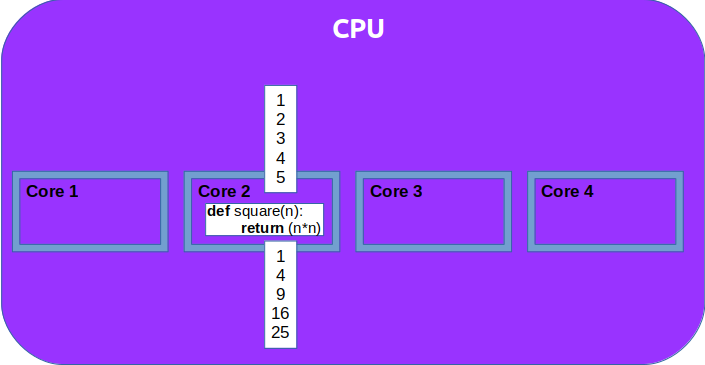

In [ ]:
import os
import multiprocessing

In [ ]:
def square(n):
    print(n, os.getpid())
    return n*n

In [ ]:
mylist = [1,2,3,4,5]
result = []

p = multiprocessing.Pool()

result = p.map(square, mylist)

2 1449
1 1448
4 1448
3 1449
5 1448


In [ ]:
result

[1, 4, 9, 16, 25]

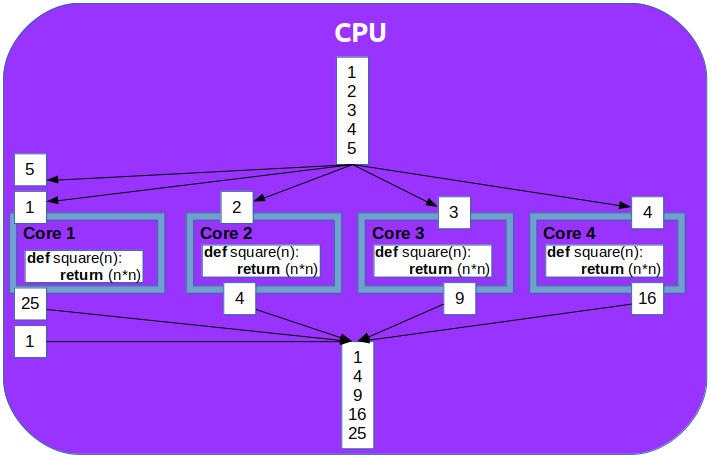